In [38]:
#Se importan las librerias que serán usadas
from pylab import *
from numpy import *
from math import factorial 


In [39]:
#Definimos una clase para unificar ambos métodos de interpolación
-
    
    #Función de diferencias divididas
    def difDivididas(self):
        
        #Se crea la variable donde se mete los calculos
        dif = zeros((len(self.xi),len(self.xi)))
        
        #Se procede a meter en la columna de 0 de la matriz los nodos en la coordenada y
        dif[:,0] = self.yi
        
        #Se hace un bucle que empiece en el indice 1 hasta recorrer todos los nodos conocidos
        for i in range(1,len(self.xi)):
            
            #Se hace un recorrido desde el indice i dado por el bucle anterior hasta recorrer todo el array
            for j in range(i,len(self.xi)):
                
                #Se hace el calculo de la diferencial dividida y se guarda en el array
                dif[j][i] = ((dif[j][i-1]-dif[j-1][i-1]) / (self.xi[j]- self.xi[j-i]))
                
        return dif
    
    #Función de interpolación por el método de Newton
    def newton(self):
        
        #En primer lugar, llamamos a la función diferenciales divididas para calcular los valores
        dif = self.difDivididas();
        
        y = zeros(len(self.x)) #Se crea una variable para ir guardando la interpolación hecha
        
        #Con el bucle for, se procede a pasar por todos los puntos a interpolar
        for i in range(len(self.x)):
            
            #Este otro bucle, lo que hace es pasar por todos los nodos conocidos
            for j in range(len(self.xi)):
                
                aprox = dif[j,j] #De la variable dif, se escoje el valor que se necesita para hacer el calculo
                
                #El último bucle, procede a pasar todos los puntos para el calculo
                for k in range(1,j+1):
                    
                    aprox = aprox * (self.x[i] - self.xi[k-1])
                
                y[i] = y[i] + aprox #Se guarda en la variable final el valor ya calculado
            
        return y 
        
    #Función para el calculo del error de la interpolación en cada punto
    def error(self):
        
        #Se crea la variable donde de guardara el error de cada punto interpolado
        error = ones(len(self.x))
        
        #Se llama a la función de diferencial dividida
        dif = self.difDivididas();
        
        #Con un bucle, se procede a calcular el error en los puntos en que se hace la interpolación
        for k in range(len(self.x)):
            
            #Se crea un array para el calculo del numerador
            num = ones(len(self.xi))
            
            #Se procede a hacer un bucle para pasar por los nodos
            for i in range(len(self.xi)):
                num[i] = (self.x[k] -self.xi[i])*dif[i,i]
            
            #Se procede a calcular y a guardar en un array el error de ese punto
            error[k] = abs(prod(num)/factorial(len(self.xi) + 1))
            
        return error
            
    


1000 loops, best of 3: 441 µs per loop
10 loops, best of 3: 43.9 ms per loop


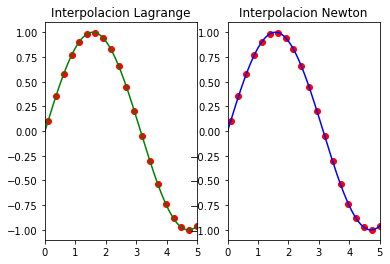

In [40]:

#Se procede a calcular una serie de nodos de prueba en x y se calcula su valor en y
max = 5.0
xs = linspace(0.1, max, 20)   #abcisas
ys = sin(xs) #ordenadas

#Se procede a evaluar el polinomio en un número determinado de puntos
xx = linspace(0.0, max, 500)

prueba = interpolacion (xs,ys,xx)

#Llamamos a la funcion con los parametros adecuados y medimos el tiempo
%timeit -c prueba.lagrange()
%timeit -c prueba.newton()

#Se muestra la grafica con la interpolación de Lagrange
ax = subplot(121)
title("Interpolacion Lagrange")
ax.plot(xs, ys, 'ro')
ax.set_xlim((0, max))
ax.plot(xx, prueba.lagrange(), '-g')

#Se muestra la gráfica con la interpolacion de Newton
bx = subplot(122)
title("Interpolacion Newton")
bx.plot(xs, ys, 'ro')
bx.set_xlim((0, max))
bx.plot(xx, prueba.newton(), '-b')
    
show()

